In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file = '/Users/igorkiss/Downloads/MLEX.csv'

In [3]:
data = pd.read_csv(file)
data.columns = ['Číslo_ML', 'Dátum', 'Status', 'Zákazník', 'Prístroj', 'XX', 'Technik', 'Cena_ND', 'Cena_Celkom']
data.head()

,Číslo_ML,Dátum,Status,Zákazník,Prístroj,XX,Technik,Cena_ND,Cena_Celkom
0,24-0005,22.01.2024,Dokončený,Vapotherm Deutschland GmbH,"PF00028038-E,",30,Július Pittner,"516,91","516,91"
1,24-0001,25.01.2024,Dokončený,Univerzitná nemocnica Bratislava,"X216AA4381, Lôžko pôrodné Hill-Rom Affinity 4",30,Igor Kiss,"1723,02","1783,02"
2,24-0002,26.01.2024,Dokončený,Univerzitná nemocnica Bratislava,"L091AA2935, Lôžko pôrodné Hill-Rom Affinity 4",30,Igor Kiss,"1700,05","1760,05"
3,24-0052,29.01.2024,Dokončený,"Všeobecná nemocnica s poliklinikou Lučenec, n. o.","PFP00001030-E, Vapotherm Precision Flow Plus",30,Július Pittner,"1128,81","1566,81"
4,24-0003,30.01.2024,Dokončený,Vapotherm Deutschland GmbH,"PFPC00052399-E, Vapotherm Precision Flow Plus",30,Július Pittner,143,143


In [4]:
data.shape

(421, 9)

In [5]:
print(data.dtypes)

Číslo_ML       object
Dátum          object
Status         object
Zákazník       object
Prístroj       object
XX              int64
Technik        object
Cena_ND        object
Cena_Celkom    object
dtype: object


In [6]:
data['Cena_ND'] = data['Cena_ND'].str.replace(',', '.').astype(float)
data['Cena_Celkom'] = data['Cena_Celkom'].str.replace(',', '.').astype(float)

In [7]:
data['Dátum'] = pd.to_datetime(data['Dátum'], format='%d.%m.%Y')
#data['Cena_ND'] = data['Cena_ND'].astype(float)
#data['Cena_Celkom'] = data['Cena_Celkom'].astype(float)

In [8]:
print(data.dtypes)

Číslo_ML               object
Dátum          datetime64[ns]
Status                 object
Zákazník               object
Prístroj               object
XX                      int64
Technik                object
Cena_ND               float64
Cena_Celkom           float64
dtype: object


In [9]:
data['Technik'].unique()

array(['Július  Pittner', 'Igor Kiss', 'Jozef Benko', 'František Dulík'],
      dtype=object)

In [10]:
total_price = data.groupby('Technik')['Cena_Celkom'].sum()
part_price = data.groupby('Technik')['Cena_ND'].sum()

In [11]:
total_price 

Technik
František Dulík    45377.73
Igor Kiss          87710.68
Jozef Benko        46414.20
Július  Pittner    20932.38
Name: Cena_Celkom, dtype: float64

In [12]:
part_price

Technik
František Dulík    39059.73
Igor Kiss          65511.18
Jozef Benko        36622.70
Július  Pittner    17659.38
Name: Cena_ND, dtype: float64

In [13]:

data['month'] = data['Dátum'].dt.month
data['year'] = data['Dátum'].dt.year
data['month_year'] = data['Dátum'].dt.to_period('M')

total_price_month = data.groupby('month_year')['Cena_Celkom'].sum()
part_price_month = data.groupby('month_year')['Cena_ND'].sum()
total_per_technician = data.groupby(['Technik', 'month_year'])['Cena_Celkom'].sum()
part_per_technician = data.groupby(['Technik', 'month_year'])['Cena_ND'].sum()


In [14]:
part_per_technician

Technik          month_year
František Dulík  2024-02        4360.39
                 2024-03        8061.72
                 2024-04        4572.31
                 2024-05       12117.21
                 2024-06        9948.10
Igor Kiss        2024-01        3537.62
                 2024-02        9472.69
                 2024-03       12653.53
                 2024-04       12033.11
                 2024-05       13689.62
                 2024-06       14124.61
Jozef Benko      2024-01           0.00
                 2024-02       14697.76
                 2024-03        8051.65
                 2024-04        5411.27
                 2024-05        6950.14
                 2024-06        1511.88
Július  Pittner  2024-01        2902.33
                 2024-02       12548.98
                 2024-03        2208.07
Name: Cena_ND, dtype: float64

In [15]:
igor_parts = part_per_technician['Igor Kiss']
igor_parts

month_year
2024-01     3537.62
2024-02     9472.69
2024-03    12653.53
2024-04    12033.11
2024-05    13689.62
2024-06    14124.61
Freq: M, Name: Cena_ND, dtype: float64

In [16]:
fero_parts = part_per_technician['František Dulík']
fero_parts  

month_year
2024-02     4360.39
2024-03     8061.72
2024-04     4572.31
2024-05    12117.21
2024-06     9948.10
Freq: M, Name: Cena_ND, dtype: float64

In [17]:
def plot_technician(technician):
    plt.figure(figsize=(12, 6)) 
    sns.barplot(x=technician.index, y=technician.values)    
    plt.xlabel('Month')
    plt.ylabel('Parts price')
    plt.title('Technician')
    plt.show()

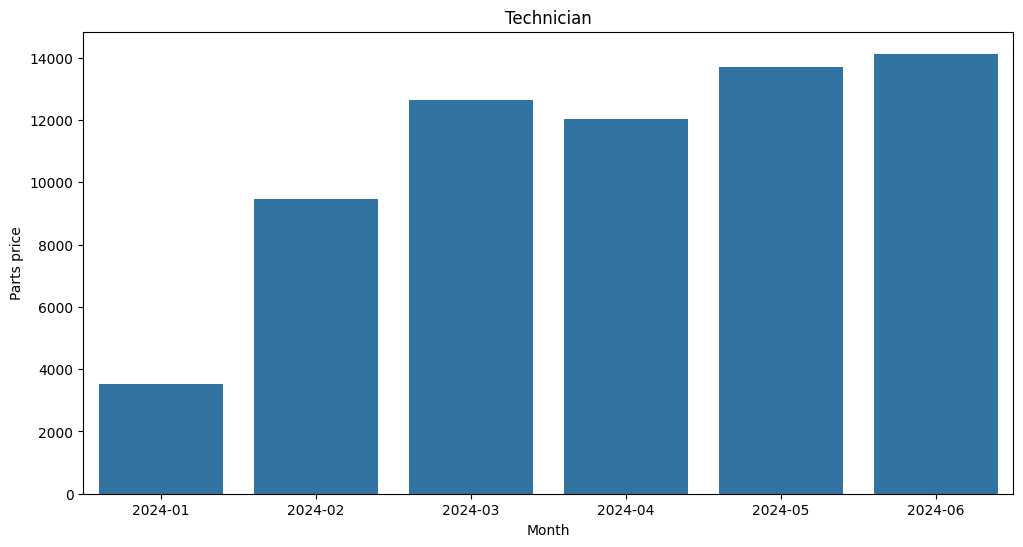

In [18]:
plot_technician(igor_parts)

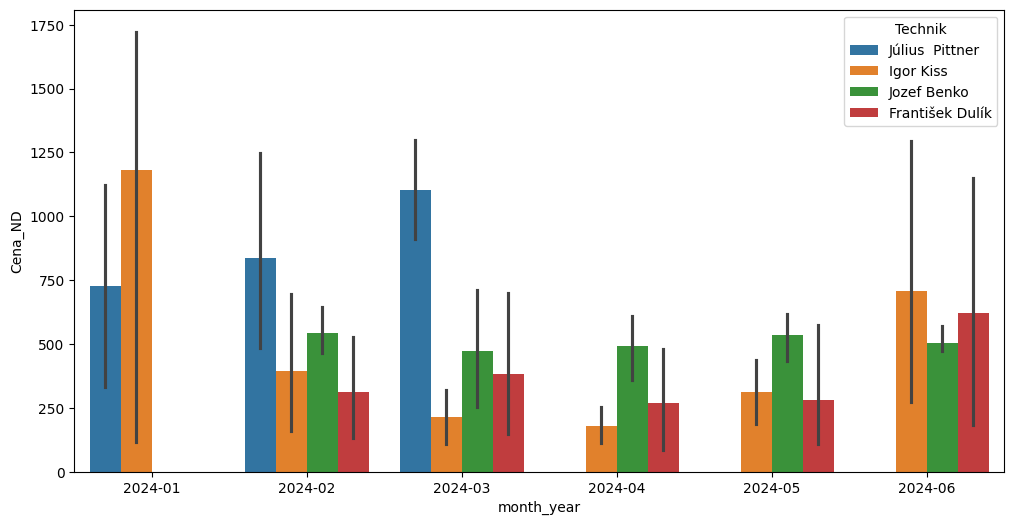

In [19]:
plt.figure(figsize=(12, 6))
sns.barplot(x='month_year', y='Cena_ND', data=data, hue='Technik')
plt.show()

In [20]:
data.groupby('Technik')['Cena_ND'].max()

Technik
František Dulík    5200.00
Igor Kiss          4806.10
Jozef Benko        1594.15
Július  Pittner    2849.96
Name: Cena_ND, dtype: float64

In [21]:
data.groupby('Technik')['Cena_ND'].mean()

Technik
František Dulík    351.889459
Igor Kiss          301.894839
Jozef Benko        508.648611
Július  Pittner    840.922857
Name: Cena_ND, dtype: float64